In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
import matplotlib.pyplot as plt

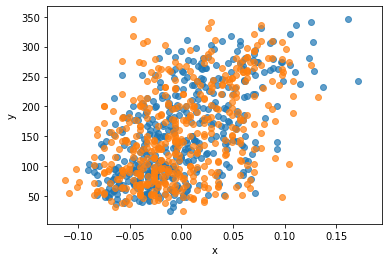

In [8]:
plt.scatter(diabetes.data[:,2],diabetes.target, alpha=0.7)
plt.scatter(diabetes.data[:,3],diabetes.target, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
x = diabetes.data[:,2]
y = diabetes.target

Gradient Decent

1. w와 b 초기화하기

In [10]:
w = 1.0
b = 1.0

2. 훈련 데이터의 첫 번째 샘플 데이터로 yhat 얻기

In [11]:
y_hat = x[0] * w + b
y_hat

1.0616962065186886

3. 타깃과 예측 데이터 비교하기

In [12]:
y[0]

151.0

4. w 값 조절해 예측값 바꾸기

In [13]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
y_hat_inc

1.0678658271705574

In [14]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

In [15]:
x[0]

0.0616962065186885

- 하지만 이런 경우 변화율이 음수인 경우 대응하지 못한다.
그렇기 때문에 변화율로 가중치를 업데이트 해야한다.
- w_rate = x[0] 임을 확인

#### 변화율로 가중치 업데이트 하기

In [16]:
w_new = w + w_rate
w_new

1.0616962065186888

- 위와 같은 경우엔 변화율이 양수이기때문에 위처럼 w값을 단순히 올리는것 처럼 업데이트가 가능한 것처럼 보인다.
- 반대로 음수인 경우에는 단순히 w값을 더하는 걸로는 오히려 yhat이 낮아지기 때문에 w값을 내려야 하므로 대응할수 없다.
- 하지만 변화율을 더해준다면 음수의 경우 음의 변화율을 갖게 되므로 변화율을 더해주면 yhat이 증가할 것이다

In [17]:
# 변화율로 절편 업데이트하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
y_hat_inc

1.1616962065186887

In [18]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

b의 변화율은 1임

In [19]:
b_new = b + 1
b_new

2.0

- 하지만 이 방법에는 한계가 있다.
- y_hat과 y가 한참 차이나는 경우 w와 b를 큰폭으로 수정하기가 어렵다.
- y_hat이 y보다 커지면 y_hat을 감소시킬 수 없다.

### 그래서 필요한게 역전파다 (backpropagation)
- 역전파는 y_hat과 y의 차이를 이용하여 w와 b를 업데이트 한다.
- y_hat과 y의 차이를 변화율에 곱해서 w를 업데이트 한다.
- 이 경우 y_hat과 y의 차이가 크면 큰폭으로 w를 업데이트 할 수 있고 y_hat이 y보다 커진 경우에도 y_hat값을 줄이는 것이 가능하다.

In [20]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
w_new, b_new

(10.250624555904514, 150.9383037934813)

- y_hat과 y의 차가 크므로 w와 b가 큰폭으로 증가한 것을 확인할 수 있다.

In [21]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1] # x가 변화율인 것은 앞에서 알아봤음
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
w_new, b_new

(14.132317616381767, 75.52764127612664)

모든 x와 y에 대해 수행

In [22]:
for x_i, y_i in zip(x,y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


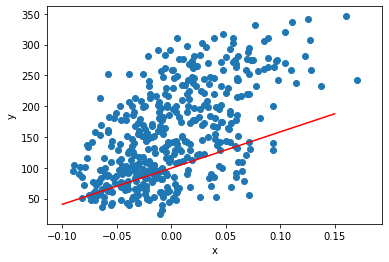

In [23]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15* w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- 직선이 썩 만족스럽지는 못하다. epoch을 늘려보자
- epoch은 전체 데이터를 모두 이용해 한 단위의 작업을 진행하는 것을 말한다.

In [24]:
for i in range(1, 100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

913.5973364345905 123.39414383177204


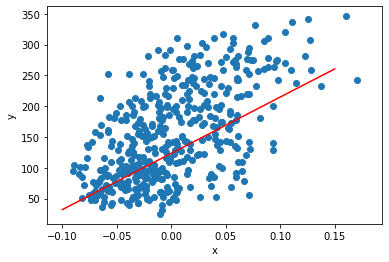

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15* w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

위의 결과보다 나아진 점을 확인할 수 있다.

6. 모델로 예측하기

In [26]:
x_new = 0.18
y_pred = 0.18 * w + b
y_pred

287.8416643899983

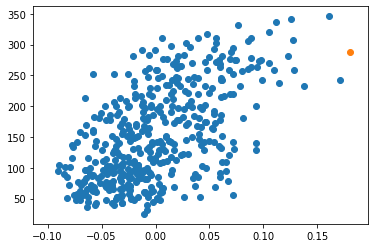

In [27]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.show()

## 선형회귀 뉴런 만들기

In [36]:
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
    
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat
  
  def backprop(self, x, err):
    w_grad = x * err # w * (y - y_hat)
    b_grad = 1 * err
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
#         print(x_i)
        err = -(y_i - y_hat)
#         print(err)
        w_grad, b_grad = self.backprop(x_i, err)
#         print(w_grad)
        self.w -= w_grad
        self.b -= b_grad

In [37]:
neuron = Neuron()
neuron.fit(x,y)

In [38]:
neuron.b

123.39414383177204

In [39]:
neuron.w

913.5973364345905

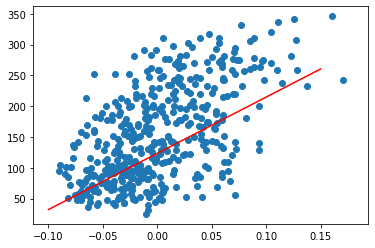

In [41]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.show()